In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Dropout
from keras.callbacks import EarlyStopping

c:\Users\Viktor\AIDEL2\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# ------------------------------------

print("X_train_full: ", X_train_full.shape)
print("X_test: ", X_test.shape)

X_train, X_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

print("X_train: ", X_train.shape)
print("X_valid: ", X_valid.shape)

X_train_full:  (60000, 28, 28)
X_test:  (10000, 28, 28)
X_train:  (55000, 28, 28)
X_valid:  (5000, 28, 28)


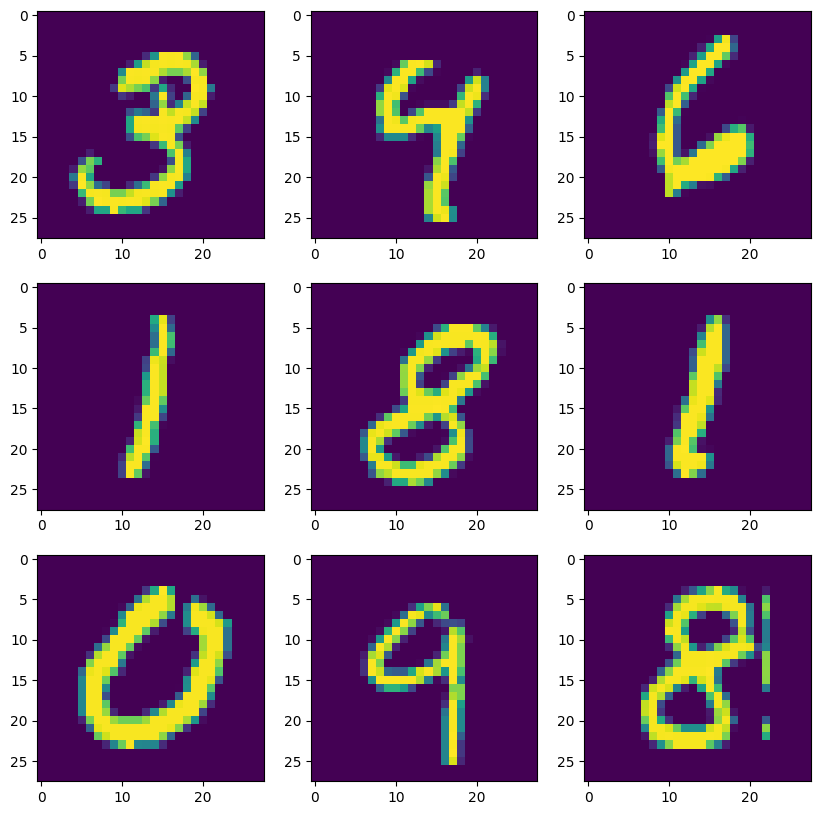

In [3]:
plt.figure(figsize=(10, 10))
for i in range(1, 10, 1):
    plt.subplot(3,3, i)
    plt.imshow(X_train[i])
plt.show()

In [4]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose=2)

Epoch 1/60
1719/1719 - 6s - 4ms/step - accuracy: 0.9200 - loss: 0.2690 - val_accuracy: 0.9680 - val_loss: 0.1128
Epoch 2/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9617 - loss: 0.1330 - val_accuracy: 0.9734 - val_loss: 0.0959
Epoch 3/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9709 - loss: 0.1068 - val_accuracy: 0.9758 - val_loss: 0.0902
Epoch 4/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9739 - loss: 0.0972 - val_accuracy: 0.9764 - val_loss: 0.0873
Epoch 5/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9776 - loss: 0.0868 - val_accuracy: 0.9768 - val_loss: 0.0932
Epoch 6/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9778 - loss: 0.0868 - val_accuracy: 0.9800 - val_loss: 0.0879
Epoch 7/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9799 - loss: 0.0786 - val_accuracy: 0.9818 - val_loss: 0.0906


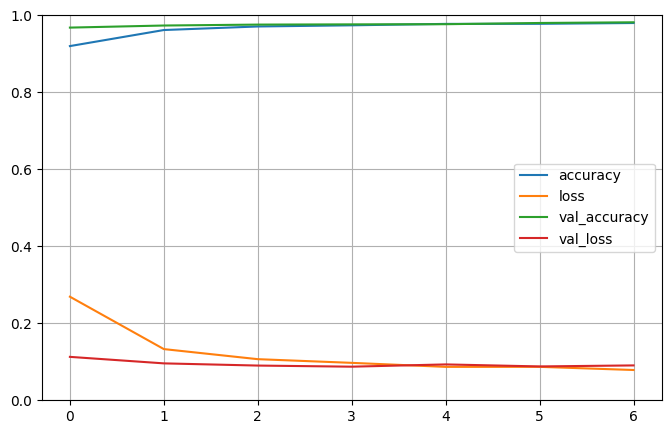

In [6]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# UPGIFT B

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import keras_tuner
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Dropout
from keras.callbacks import EarlyStopping

In [8]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# ------------------------------------

print("X_train_full: ", X_train_full.shape)
print("X_test: ", X_test.shape)

X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

print("X_train: ", X_train.shape)
print("X_valid: ", X_val.shape)

X_train_full:  (60000, 28, 28)
X_test:  (10000, 28, 28)
X_train:  (55000, 28, 28)
X_valid:  (5000, 28, 28)


In [9]:
def build_model(hp):
  model = keras.Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(
      hp.Int('units', min_value=32, max_value=512, step=32),
      activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax')) 
  
  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_tuning_dir',
    project_name='mnist_run_2',
    overwrite=True
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.9811999797821045

Best val_accuracy So Far: 0.9811999797821045
Total elapsed time: 00h 02m 06s


c:\Users\Viktor\AIDEL2\venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = best_model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=2)

Epoch 1/60
1719/1719 - 6s - 4ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9800 - val_loss: 0.0698
Epoch 2/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9806 - val_loss: 0.0673
Epoch 3/60
1719/1719 - 6s - 3ms/step - accuracy: 0.9943 - loss: 0.0171 - val_accuracy: 0.9790 - val_loss: 0.0805
Epoch 4/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9790 - val_loss: 0.0787
Epoch 5/60
1719/1719 - 5s - 3ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9816 - val_loss: 0.0784


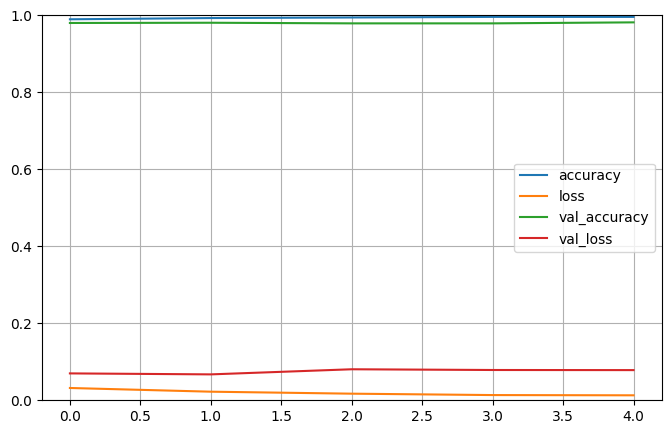

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()